In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit   

Lectura de los datos
Se asume que se han realizado 5 ensayos y que los archivos CSV están nombrados como ensayo_sin_ventilador_1.csv, ensayo_sin_ventilador_2.csv, ..., ensayo_sin_ventilador_5.csv.

In [2]:
# Lista para almacenar los DataFrames de cada ensayo
ensayos_sin_ventilador = []

# Leer los archivos CSV de los ensayos sin ventilador
for i in range(1, 6):
    archivo = f'CSV registros/Ensayos sin ventilador/ensayo_sin_ventilador_{i}.csv'
    df = pd.read_csv(archivo, encoding='latin1') 
    ensayos_sin_ventilador.append(df)

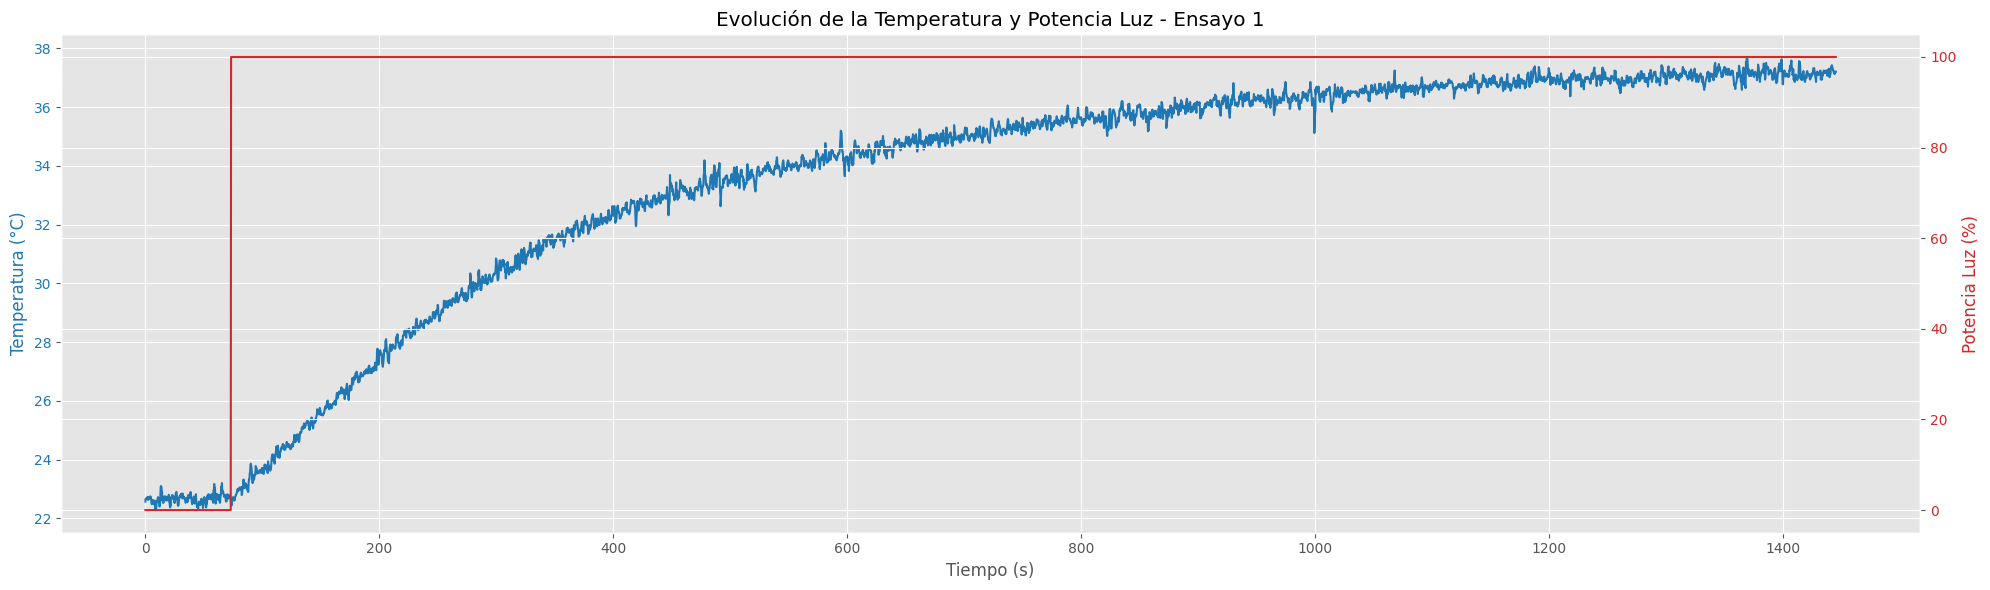

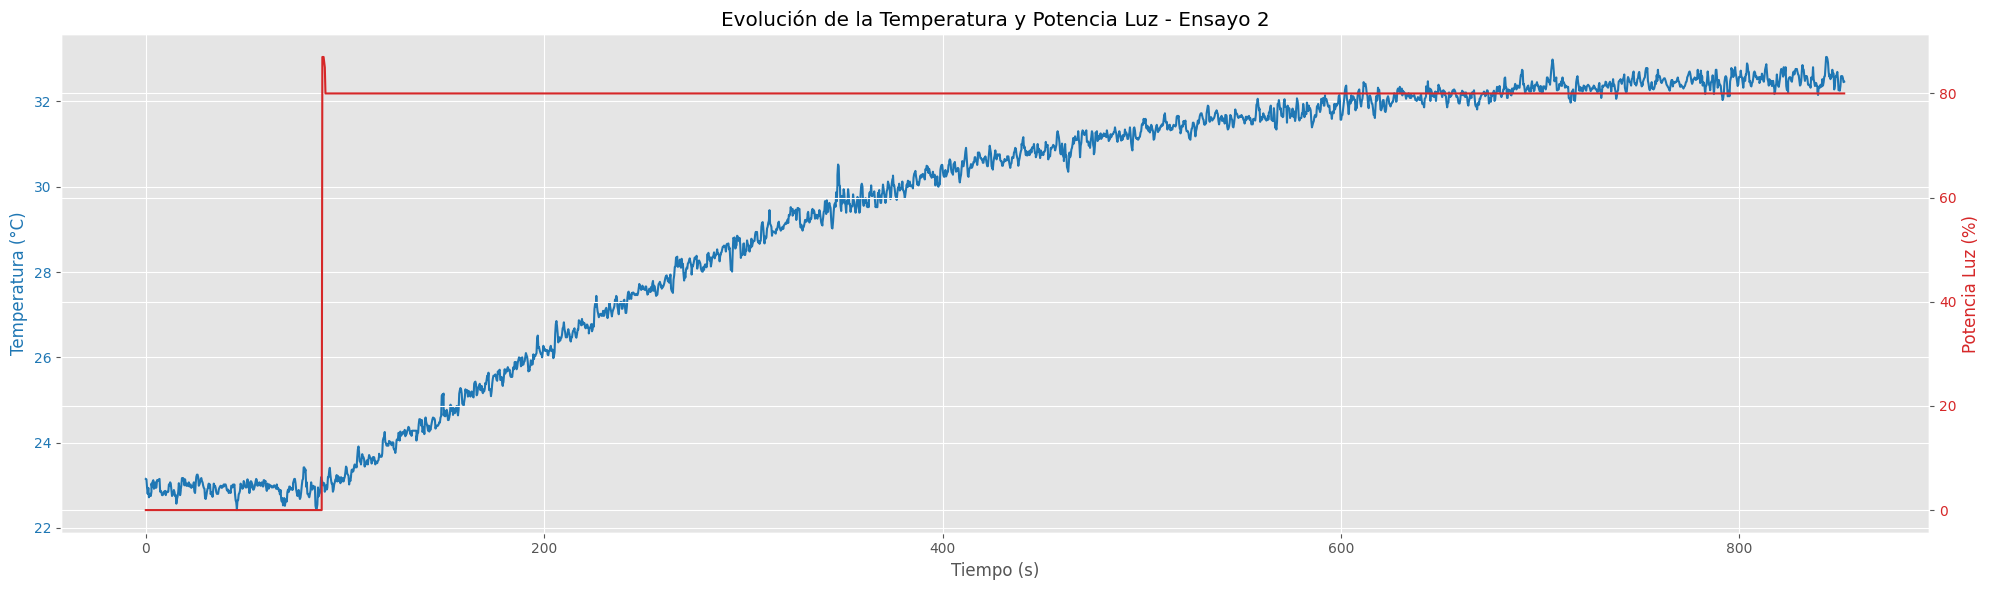

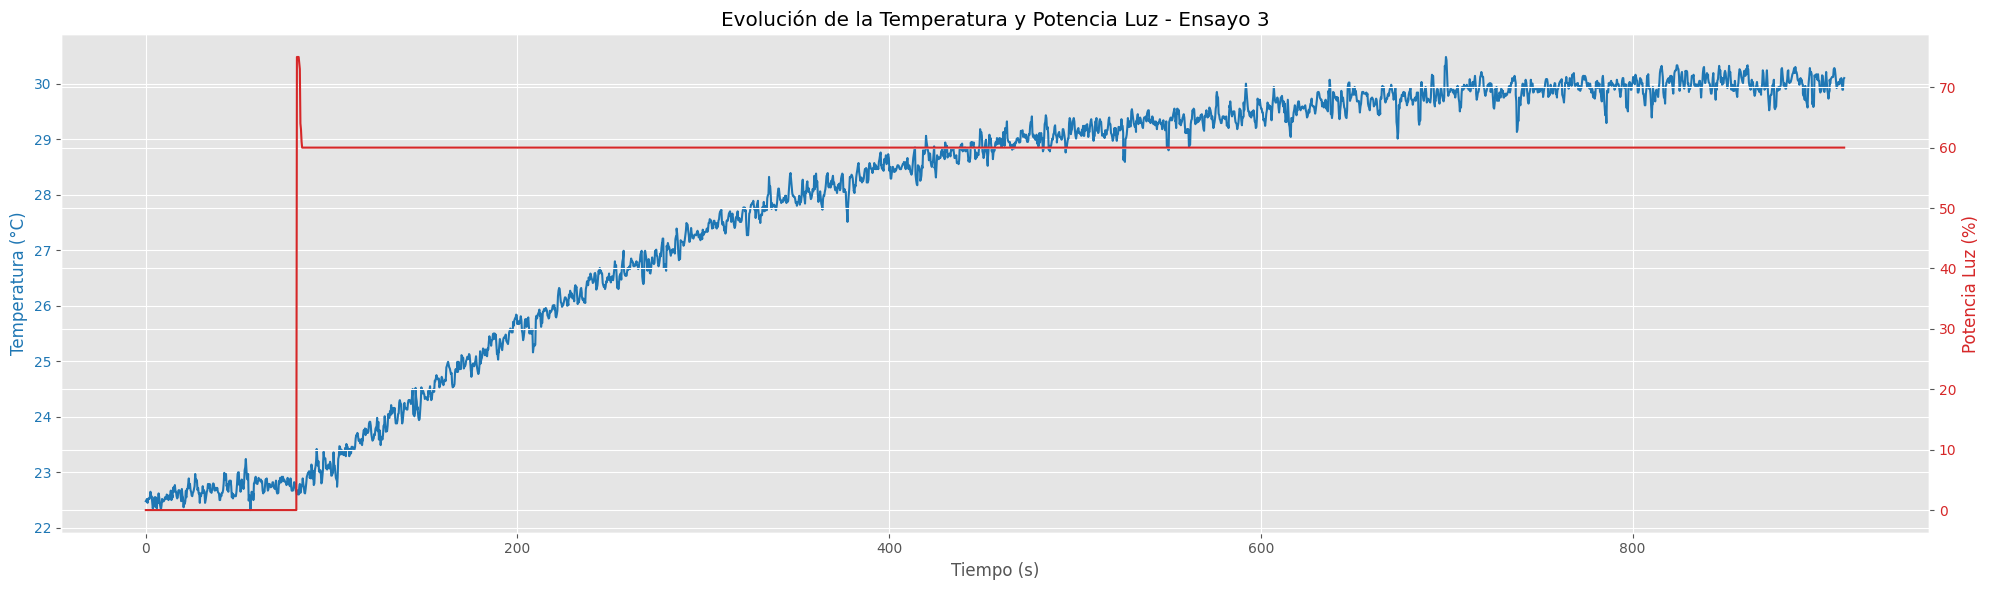

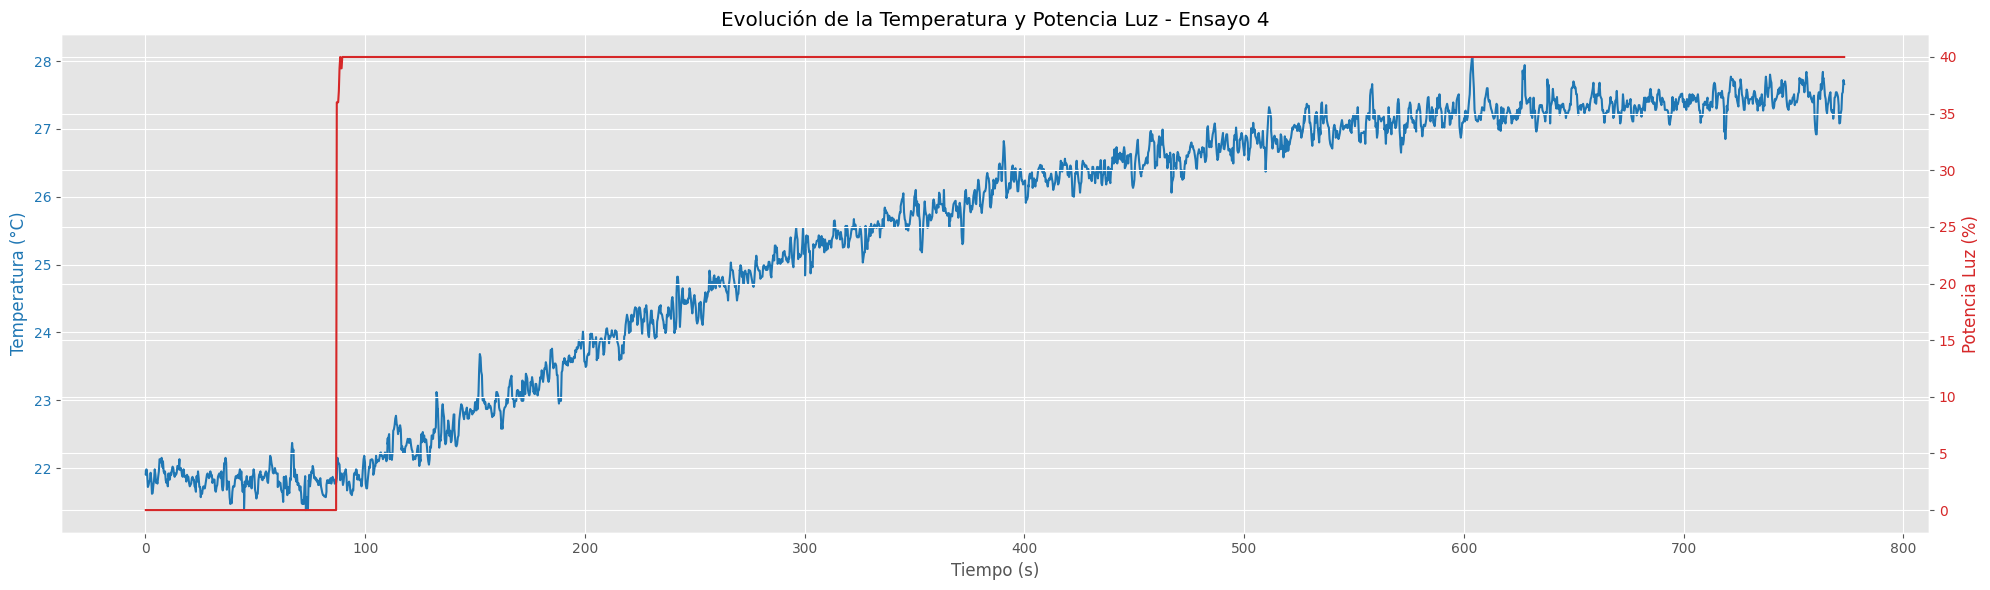

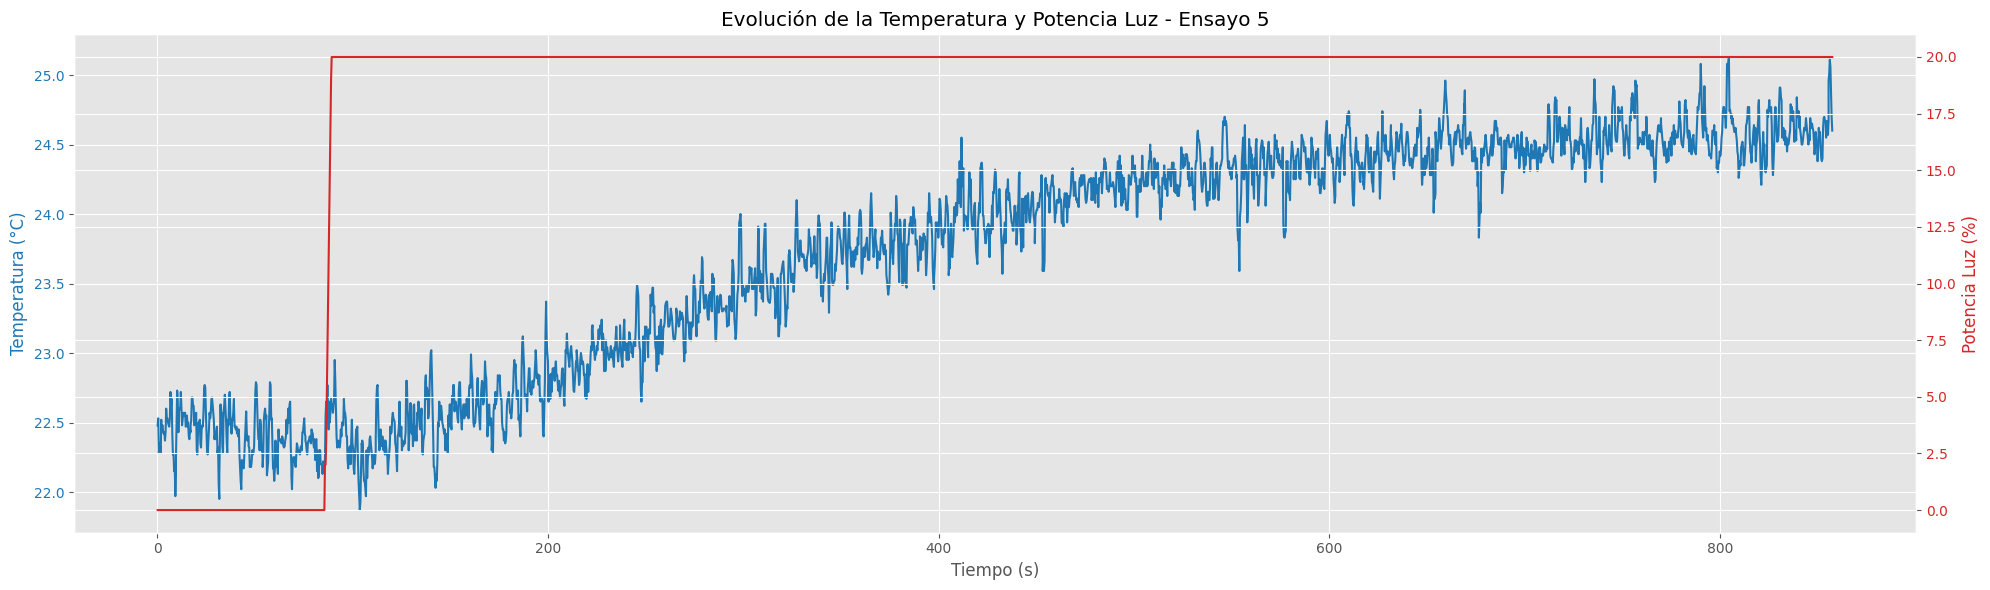

In [3]:
# Configurar el estilo de las gráficas
plt.style.use('ggplot')

# Graficar los ensayos
for i, df in enumerate(ensayos_sin_ventilador):
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Eje para la temperatura
    ax1.plot(df['Tiempo'], df['Temperatura (°C)'], label=f'Temperatura Ensayo {i+1}', color='tab:blue')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Temperatura (°C)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Crear un segundo eje para la potencia de la luz
    ax2 = ax1.twinx()
    ax2.plot(df['Tiempo'], df['Potencia Luz (%)'], label='Potencia Luz (%)', color='tab:red')
    ax2.set_ylabel('Potencia Luz (%)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Título del gráfico
    plt.title(f'Evolución de la Temperatura y Potencia Luz - Ensayo {i+1}')
    
    # Mostrar leyenda para ambos ejes
    fig.tight_layout()
    plt.show()

In [4]:
P_max = 100  # Potencia máxima de la luz

# Porcentajes de potencia para cada ensayo
porcentajes_potencia = [100, 80, 60, 40, 20]

# Lista para almacenar los DataFrames de cada ensayo
ensayos_sin_ventilador = []

In [5]:
def procesar_ensayo(df, porcentaje_potencia, P_max):
    # Filtrar los datos desde el segundo 80 en adelante
    df = df[df['Tiempo'] >= 80].reset_index(drop=True)
    
    # Variables de entrada
    tiempo = df['Tiempo'] - df['Tiempo'].iloc[0]  # Reiniciar el tiempo a 0
    temperatura = df['Temperatura (°C)']
    potencia_luz = df['Potencia Luz (%)']
    
    # Potencia aplicada en %
    P_inicial = 0  # Antes del escalón, asumimos que es 0 %
    P_final = (porcentaje_potencia / 100) * P_max
    delta_P = P_final - P_inicial
    
    # Calcular ΔT_final (cambio de temperatura en estado estacionario)
    n_estacionario = int(len(temperatura) * 0.9)
    T_final = np.mean(temperatura[n_estacionario:])

    T_inicial = np.mean(temperatura[:50])  # Temperatura inicial (promedio de los primeros 50 segundos)
    delta_T_final = T_final - T_inicial
    
    # Calcular la constante de tiempo τ
    T_tau = T_inicial + 0.632 * delta_T_final
    indice_tau = np.abs(temperatura - T_tau).idxmin()
    tiempo_tau = tiempo.iloc[indice_tau]
    
    # Calcular la ganancia estática K
    K = delta_T_final / delta_P if delta_P != 0 else np.nan  # Evitar división por cero
    
    # Crear el modelo teórico
    t_modelo = np.linspace(0, tiempo.iloc[-1], 1000)
    T_modelo = T_inicial + delta_T_final * (1 - np.exp(-t_modelo / tiempo_tau))
    
    # Mostrar resultados
    print(f'Ensayo con potencia al {porcentaje_potencia}%')
    print(f'Delta P (P%): {delta_P:.2f}')
    print(f'Temperatura inicial: {T_inicial:.2f} °C')
    print(f'Temperatura final: {T_final:.2f} °C')
    print(f'Delta T final: {delta_T_final:.2f} °C')
    print(f'Constante de tiempo (τ): {tiempo_tau:.2f} s')
    print(f'Ganancia estática (K): {K:.4f} °C/P%')
    print('-----------------------------------')
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(tiempo, temperatura, label='Datos Experimentales', color='b')
    plt.plot(t_modelo, T_modelo, 'r--', label='Modelo Teórico')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (°C)')
    plt.title(f'Ensayo al {porcentaje_potencia}% de Potencia')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return K, tiempo_tau


Ensayo con potencia al 100%
Delta P (P%): 100.00
Temperatura inicial: 23.25 °C
Temperatura final: 37.13 °C
Delta T final: 13.89 °C
Constante de tiempo (τ): 296.12 s
Ganancia estática (K): 0.1389 °C/P%
-----------------------------------


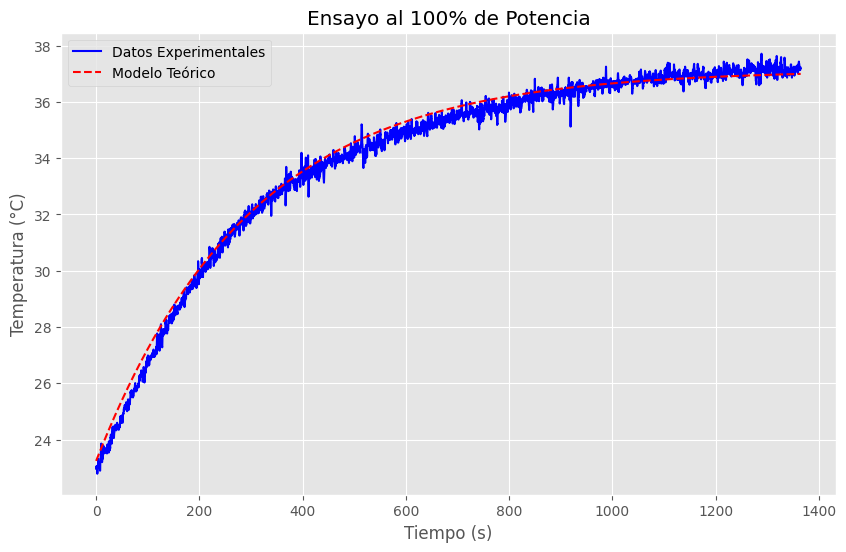

Ensayo con potencia al 80%
Delta P (P%): 80.00
Temperatura inicial: 22.95 °C
Temperatura final: 32.52 °C
Delta T final: 9.56 °C
Constante de tiempo (τ): 236.68 s
Ganancia estática (K): 0.1195 °C/P%
-----------------------------------


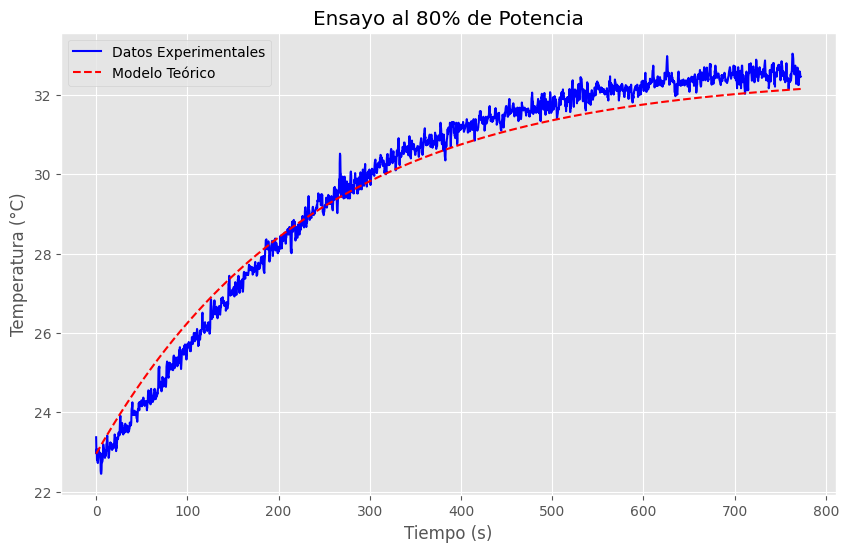

Ensayo con potencia al 60%
Delta P (P%): 60.00
Temperatura inicial: 22.88 °C
Temperatura final: 30.01 °C
Delta T final: 7.13 °C
Constante de tiempo (τ): 205.53 s
Ganancia estática (K): 0.1188 °C/P%
-----------------------------------


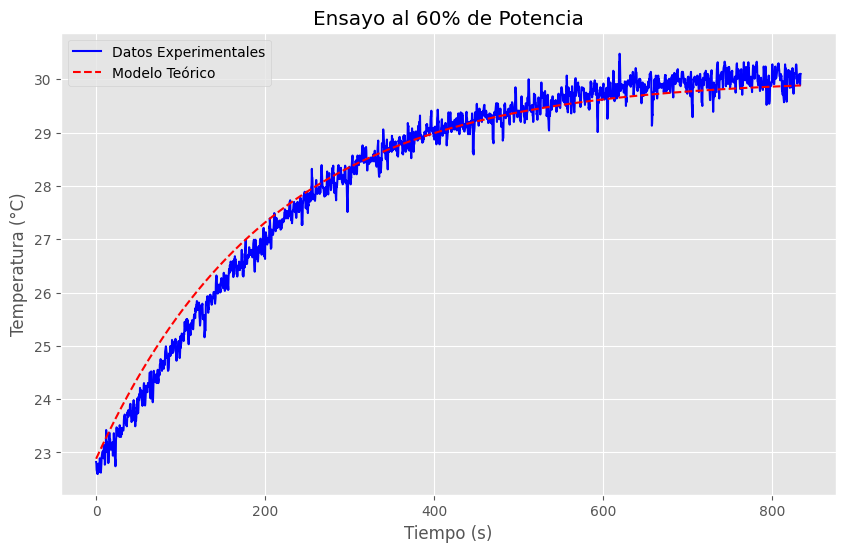

Ensayo con potencia al 40%
Delta P (P%): 40.00
Temperatura inicial: 21.79 °C
Temperatura final: 27.46 °C
Delta T final: 5.67 °C
Constante de tiempo (τ): 216.53 s
Ganancia estática (K): 0.1417 °C/P%
-----------------------------------


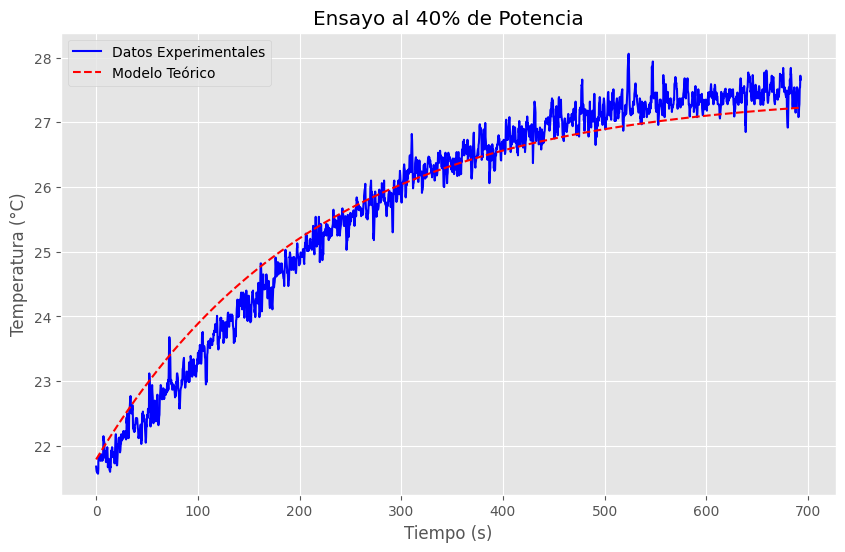

Ensayo con potencia al 20%
Delta P (P%): 20.00
Temperatura inicial: 22.43 °C
Temperatura final: 24.60 °C
Delta T final: 2.17 °C
Constante de tiempo (τ): 264.67 s
Ganancia estática (K): 0.1085 °C/P%
-----------------------------------


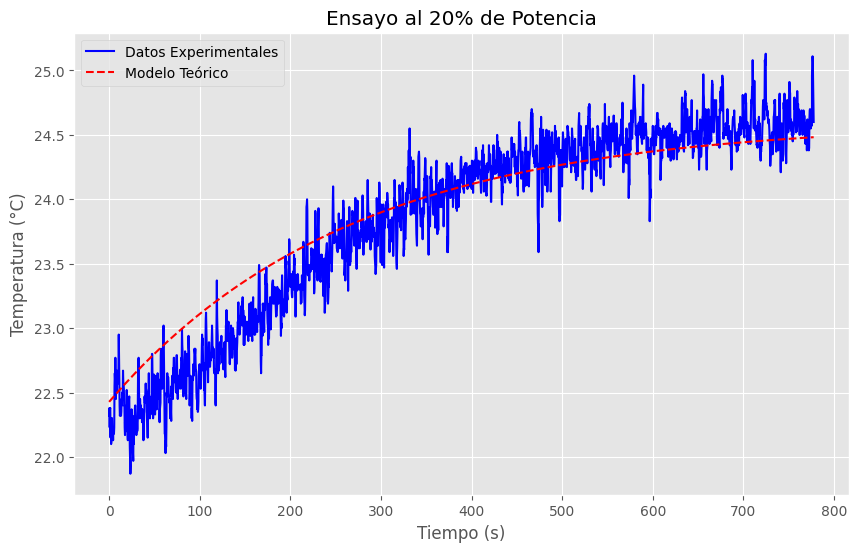

Ganancia estática promedio (K): 0.1255 °C/P%
Constante de tiempo promedio (τ): 243.91 s


In [6]:
# Leer los archivos CSV de los ensayos sin ventilador
for i in range(1, 6):
    archivo = f'CSV registros/Ensayos sin ventilador/ensayo_sin_ventilador_{i}.csv'
    df = pd.read_csv(archivo, encoding='latin1') 
    ensayos_sin_ventilador.append(df)

# Listas para almacenar los resultados
K_list = []
tau_list = []

for i, df in enumerate(ensayos_sin_ventilador):
    porcentaje_potencia = porcentajes_potencia[i]
    K, tau = procesar_ensayo(df, porcentaje_potencia, P_max)
    K_list.append(K)
    tau_list.append(tau)

# Eliminar posibles valores NaN
K_list_clean = [k for k in K_list if not np.isnan(k)]
tau_list_clean = [t for t in tau_list if not np.isnan(t)]

# Calcular promedios
K_promedio = np.mean(K_list_clean)
tau_promedio = np.mean(tau_list_clean)

print(f'Ganancia estática promedio (K): {K_promedio:.4f} °C/P%')
print(f'Constante de tiempo promedio (τ): {tau_promedio:.2f} s')


Se asume que se han realizado ensayos con el ventilador a diferentes velocidades y que los archivos CSV están nombrados como ensayo_con_ventilador_1.csv, ..., ensayo_con_ventilador_5.csv.

In [7]:
# Lista para almacenar los DataFrames de cada ensayo con ventilador
ensayos_con_ventilador = []
Potencias = [20, 40, 60, 80, 100]
Ventilador = [7, 9.5, 12]
# Leer los archivos CSV de los ensayos con ventilador
for i in Ventilador:
    for j in Potencias:
        archivo = f'CSV registros/Ensayo {j} ventilador/ensayo_con_ventilador_{i}.csv'
        df = pd.read_csv(archivo, encoding='latin1')
        ensayos_con_ventilador.append(df)


In [8]:
umbral_rpm = 5000  # Ajusta este valor según tus necesidades


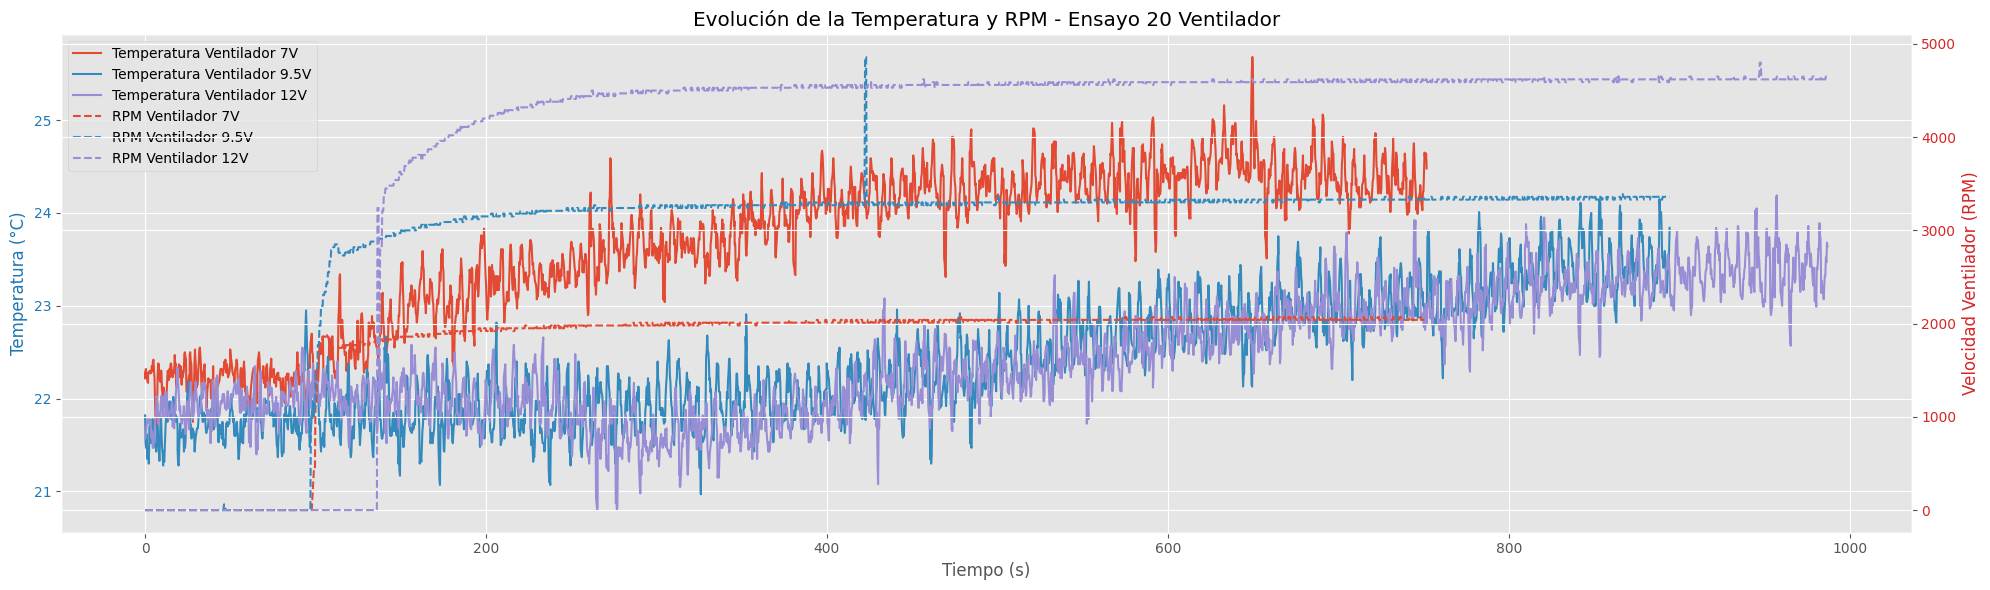

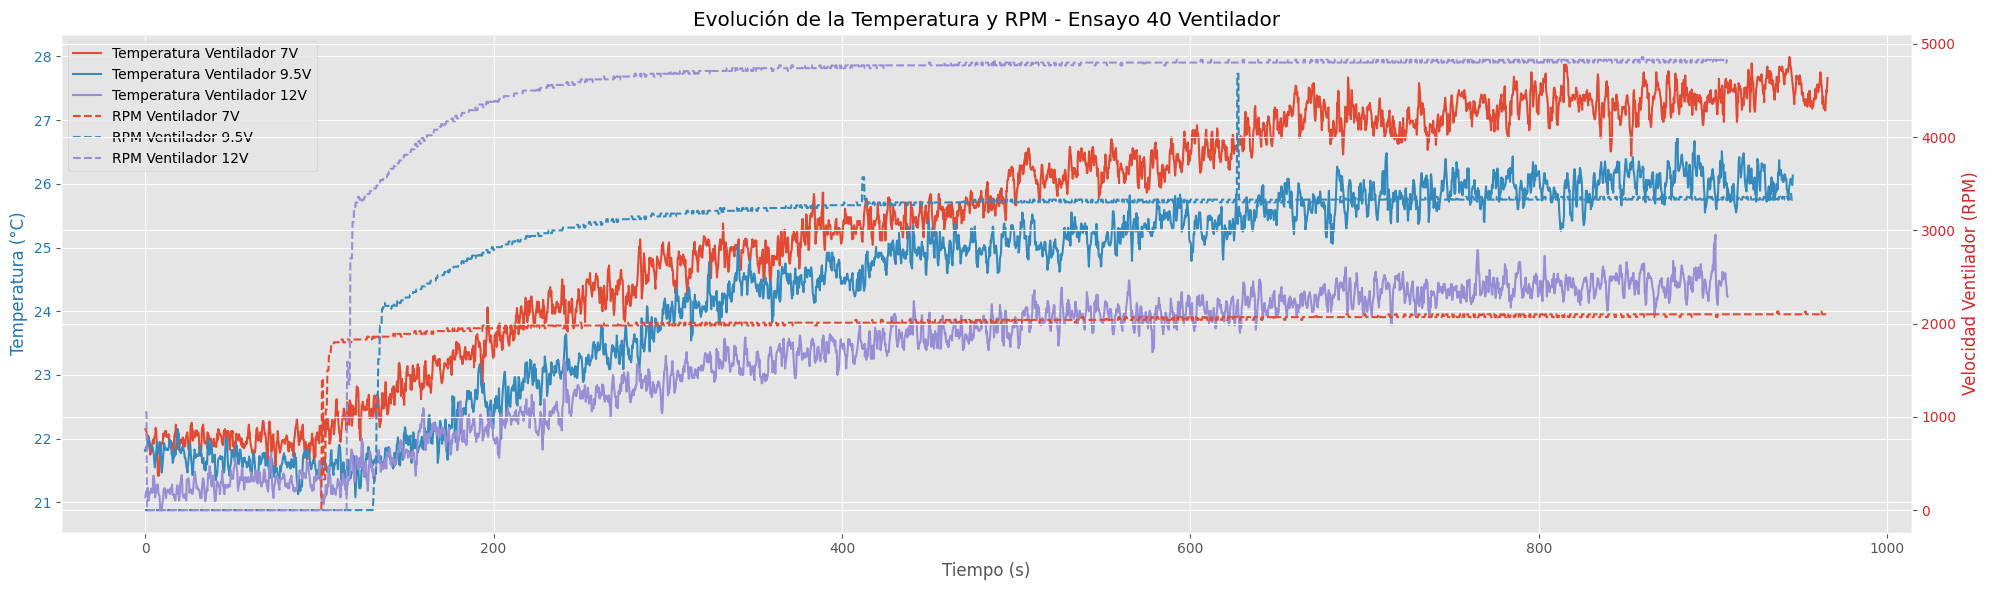

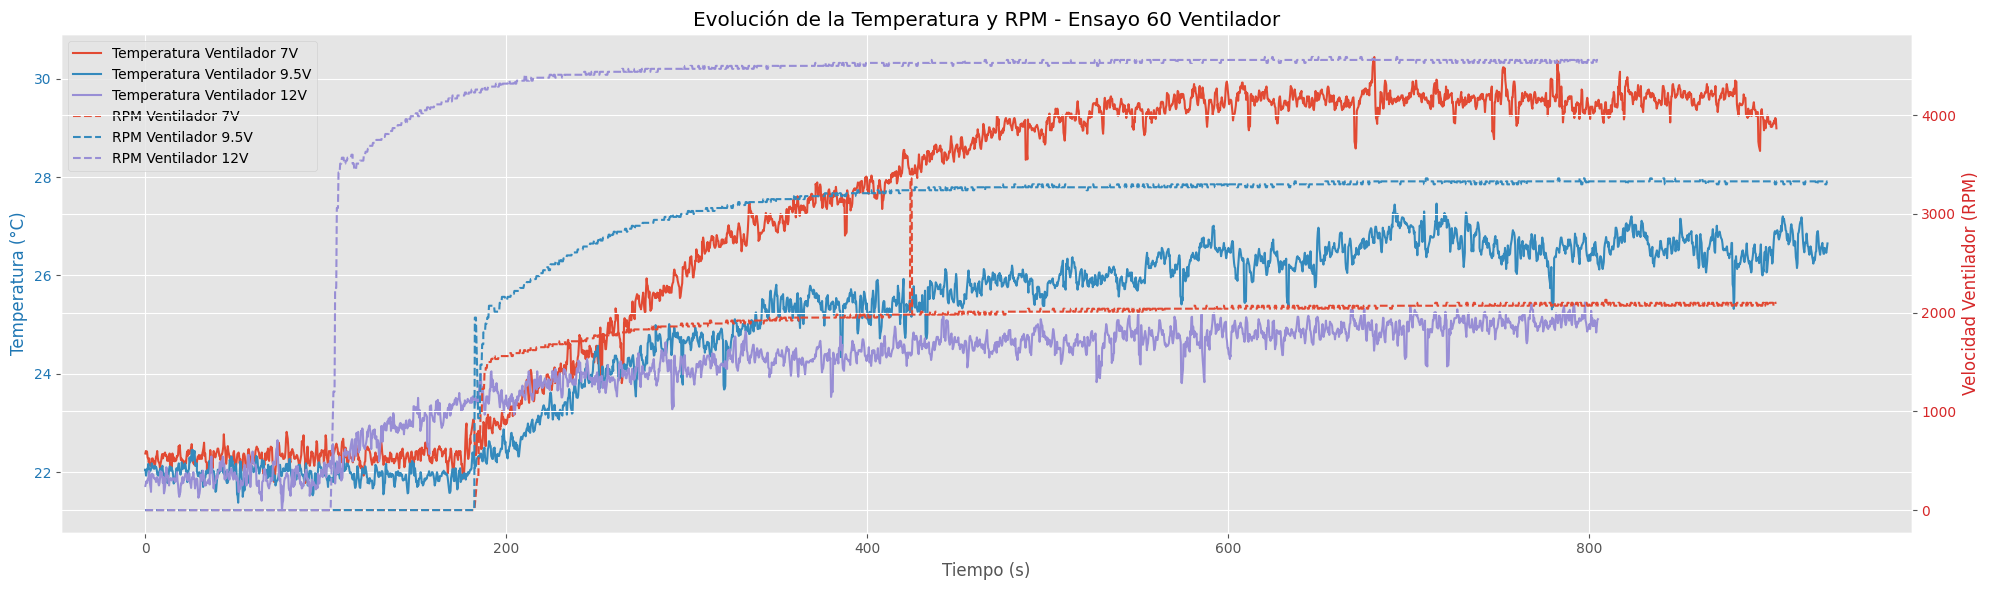

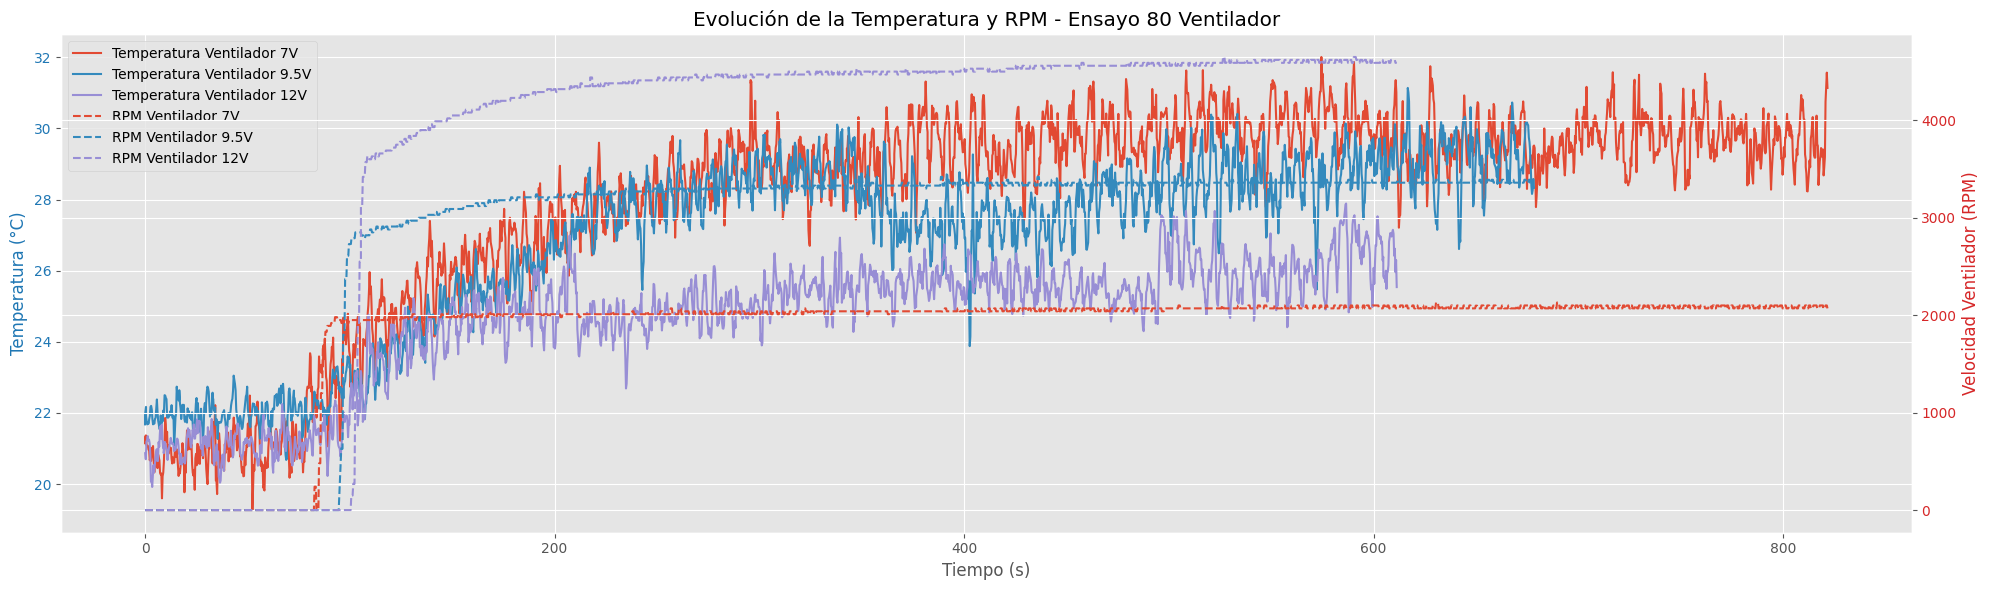

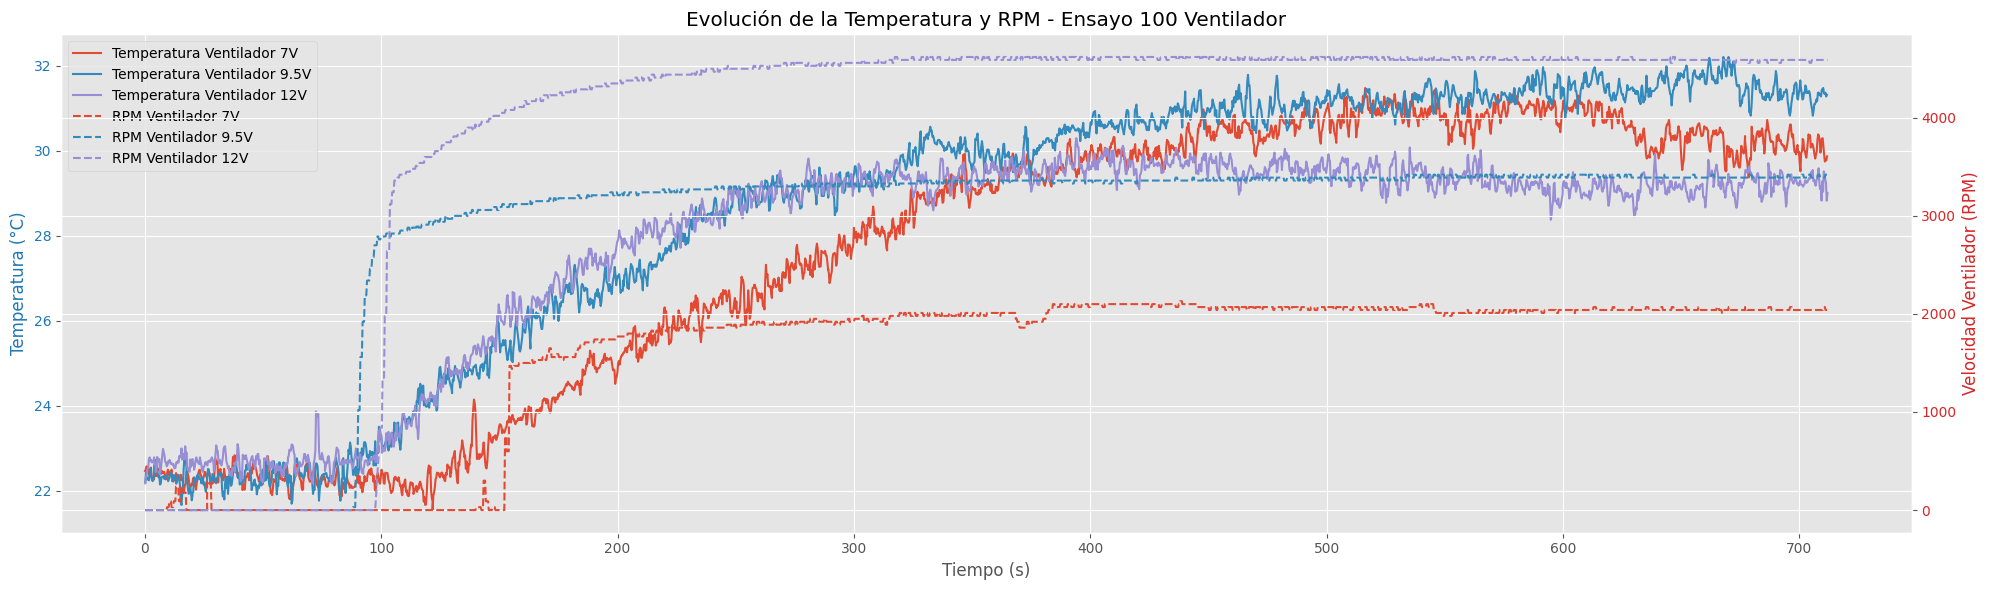

In [9]:
# Crear los gráficos
for j in Potencias:
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Graficar la temperatura
    for i in Ventilador:
        archivo = f'CSV registros/Ensayo {j} ventilador/ensayo_con_ventilador_{i}.csv'
        df = pd.read_csv(archivo, encoding='latin1')
        
        ax1.plot(df['Tiempo'], df['Temperatura (°C)'], label=f'Temperatura Ventilador {i}V')

    # Configuración del eje de temperatura
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Temperatura (°C)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Crear un segundo eje para las RPM
    ax2 = ax1.twinx()

    # Graficar las RPM filtradas
    for i in Ventilador:
        archivo = f'CSV registros/Ensayo {j} ventilador/ensayo_con_ventilador_{i}.csv'
        df = pd.read_csv(archivo, encoding='latin1')

        # Verificar si la columna de RPM contiene datos y filtrar por umbral
        if 'Velocidad Ventilador (RPM)' in df.columns:
            df_filtrado = df[df['Velocidad Ventilador (RPM)'] <= umbral_rpm]

            # Graficar los valores filtrados
            ax2.plot(
                df_filtrado['Tiempo'], 
                df_filtrado['Velocidad Ventilador (RPM)'], 
                label=f'RPM Ventilador {i}V', 
                linestyle='--'
            )

    # Configuración del eje de RPM
    ax2.set_ylabel('Velocidad Ventilador (RPM)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Título del gráfico
    plt.title(f'Evolución de la Temperatura y RPM - Ensayo {j} Ventilador')

    # Combinar leyendas de ambos ejes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    fig.tight_layout()
    plt.show()

Simulacion

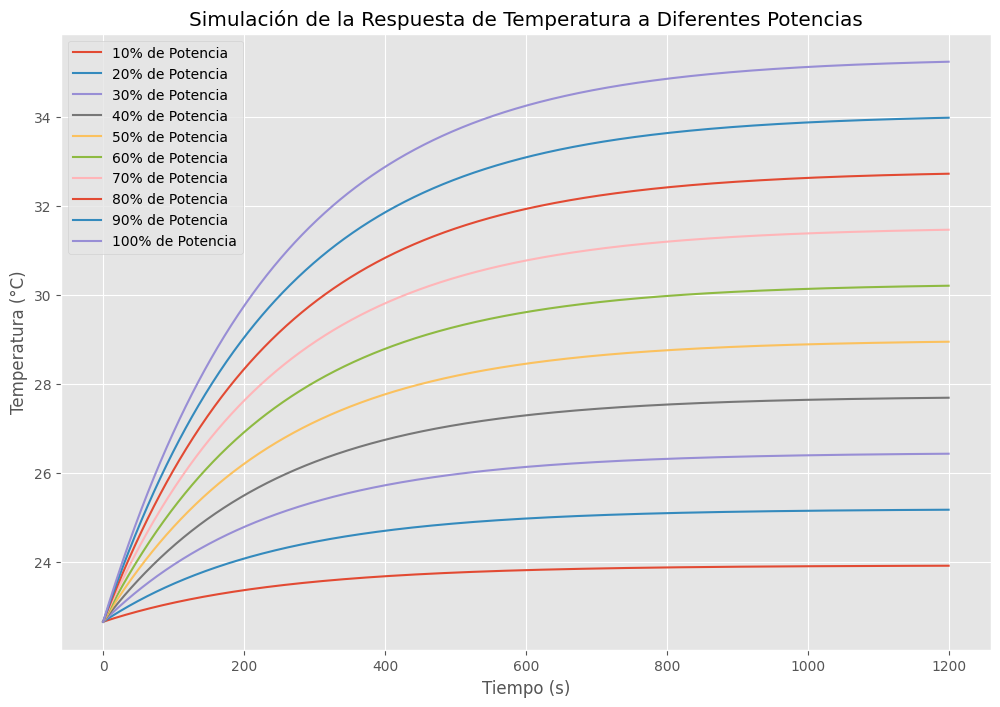

In [10]:
# Parámetros del sistema
K = 0.1268  # Ganancia estática promedio (°C/P%)
tau = 243.54  # Constante de tiempo promedio (s)
P_max = 100  # Potencia máxima (P%)
temperatura = df['Temperatura (°C)']
temperatura = temperatura[:50].mean()
T_inicial = temperatura  # Temperatura inicial (°C)

# Vector de tiempo para la simulación
tiempo = np.arange(0, 1200, 1)  # Desde 0 hasta 2000 s en incrementos de 1 s

# Lista de niveles de potencia en porcentaje
niveles_potencia = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Crear la figura para las gráficas
plt.figure(figsize=(12, 8))

for porcentaje_potencia in niveles_potencia:
    # Cálculo de ΔP y ΔT_final para cada nivel de potencia
    delta_P = P_max * (porcentaje_potencia / 100)
    delta_T_final = K * delta_P
    
    # Cálculo de la temperatura en función del tiempo
    T = T_inicial + delta_T_final * (1 - np.exp(-tiempo / tau))
    
    # Graficar la respuesta
    plt.plot(tiempo, T, label=f'{porcentaje_potencia}% de Potencia')

# Configuración de la gráfica
plt.title('Simulación de la Respuesta de Temperatura a Diferentes Potencias')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


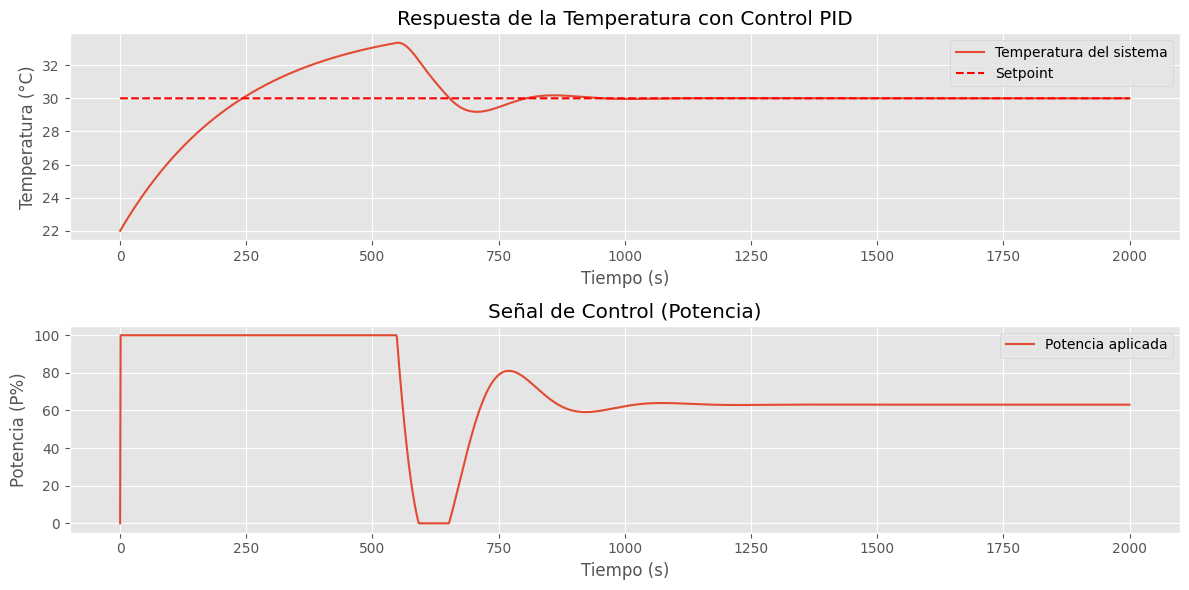

In [11]:
# Parámetros del sistema
K = 0.1268  # Ganancia estática (°C/P%)
tau = 243.54  # Constante de tiempo (s)

# Parámetros del controlador PID
Kp = 30.0
Ki = 1.0
Kd = 0.0

# Configuración de la simulación
dt = 1.0  # Paso de tiempo (s)
t_final = 2000  # Tiempo total de simulación (s)
n_steps = int(t_final / dt)
t = np.linspace(0, t_final, n_steps)

# Variables de estado
T = np.zeros(n_steps)  # Temperatura del sistema
P = np.zeros(n_steps)  # Potencia aplicada (%)

# Variables del controlador
e_prev = 0.0  # Error previo
integral = 0.0  # Integral del error

# Setpoint
T_setpoint = 30.0  # Temperatura deseada (°C)

# Temperatura ambiente inicial
T_ambiente = 22.0  # (°C)
T[0] = T_ambiente

for i in range(1, n_steps):
    # Cálculo del error
    e = T_setpoint - T[i-1]
    
    # Integral del error
    integral += e * dt
    
    # Derivada del error
    derivative = (e - e_prev) / dt
    
    # Control PID
    u = Kp * e + Ki * integral + Kd * derivative
    
    # Saturación del control
    if u > 100.0:  # Potencia máxima
        u = 100.0
    elif u < 0.0:
        u = 0.0
    
    P[i] = u  # Potencia aplicada en %
    
    # Actualización del sistema (modelo de primer orden)
    dT = (-(T[i-1] - T_ambiente) + K * P[i]) * (dt / tau)
    T[i] = T[i-1] + dT
    
    # Actualización del error previo
    e_prev = e

# Gráficas de los resultados
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, T, label='Temperatura del sistema')
plt.plot(t, T_setpoint * np.ones_like(t), 'r--', label='Setpoint')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Respuesta de la Temperatura con Control PID')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, P, label='Potencia aplicada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Potencia (P%)')
plt.title('Señal de Control (Potencia)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Matzi\AppData\Local\Temp\ipykernel_25136\1584986405.py:2: SyntaxWarning: invalid escape sequence '\C'
  archivo = 'CSV registros\Control automatico PI\Ensayo 4 30c.csv'


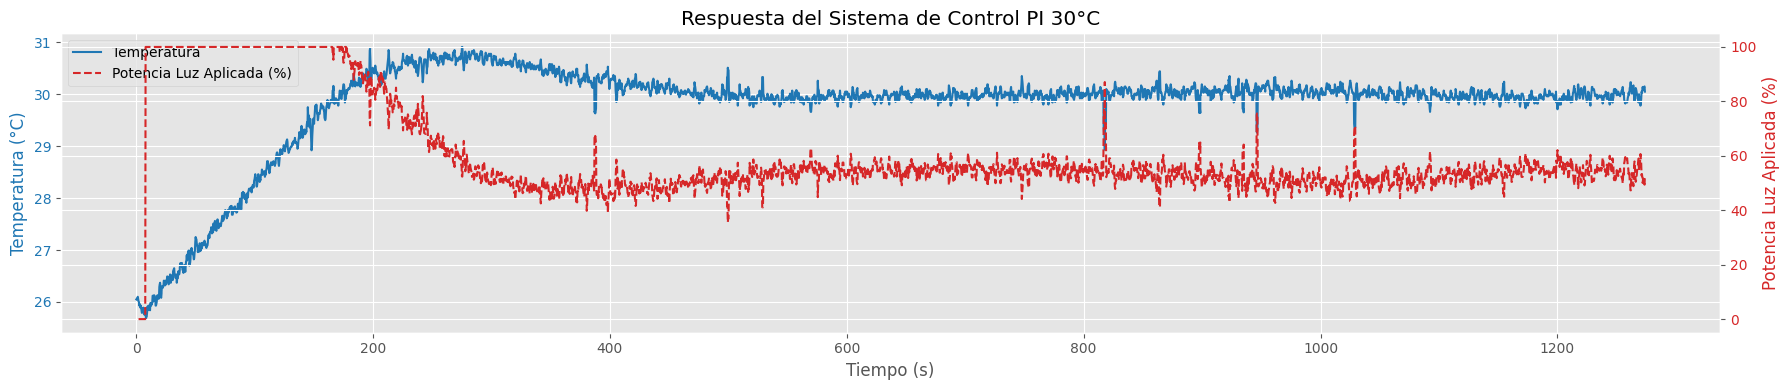

30.91

In [12]:

# Leer los archivos CSV de los ensayos con ventilador
archivo = 'CSV registros\Control automatico PI\Ensayo 4 30c.csv'
df = pd.read_csv(archivo, encoding='latin1')
# Graficar los datos
fig, ax1 = plt.subplots(figsize=(18, 4))

# Eje para la temperatura
ax1.plot(df['Tiempo'], df['Temperatura (°C)'], label='Temperatura', color='tab:blue')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Temperatura (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Crear un segundo eje para la Potencia Luz Aplicada
ax2 = ax1.twinx()
ax2.plot(df['Tiempo'], df['Potencia Luz Aplicada (%)'], label='Potencia Luz Aplicada (%)', color='tab:red', linestyle='--')
ax2.set_ylabel('Potencia Luz Aplicada (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título del gráfico
plt.title('Respuesta del Sistema de Control PI 30°C')

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.grid(True)
plt.show()

df['Temperatura (°C)'].max()

In [13]:
#calcular media de temperatura cuando pasan 600 seg
df['Temperatura (°C)'][df['Tiempo'] > 600].mean()

29.996276785714286

In [14]:
# Temperatura deseada
T_deseada = 30.0

# Calcular el sobrepaso
sobrepaso = df['Temperatura (°C)'].max() - T_deseada

# Calcular el error máximo
error_maximo = np.max(np.abs(df['Temperatura (°C)'].max() - T_deseada))

# Calcular el error máximo porcentual
error_maximo_porcentual = (error_maximo / T_deseada) * 100

print(f'Sobrepaso: {sobrepaso:.2f} °C')
print(f'Error máximo porcentual: {error_maximo_porcentual:.2f} %')


Sobrepaso: 0.91 °C
Error máximo porcentual: 3.03 %


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Matzi\AppData\Local\Temp\ipykernel_25136\1809360687.py:2: SyntaxWarning: invalid escape sequence '\C'
  archivo = 'CSV registros\Control automatico PI\Ensayo 5 25c.csv'


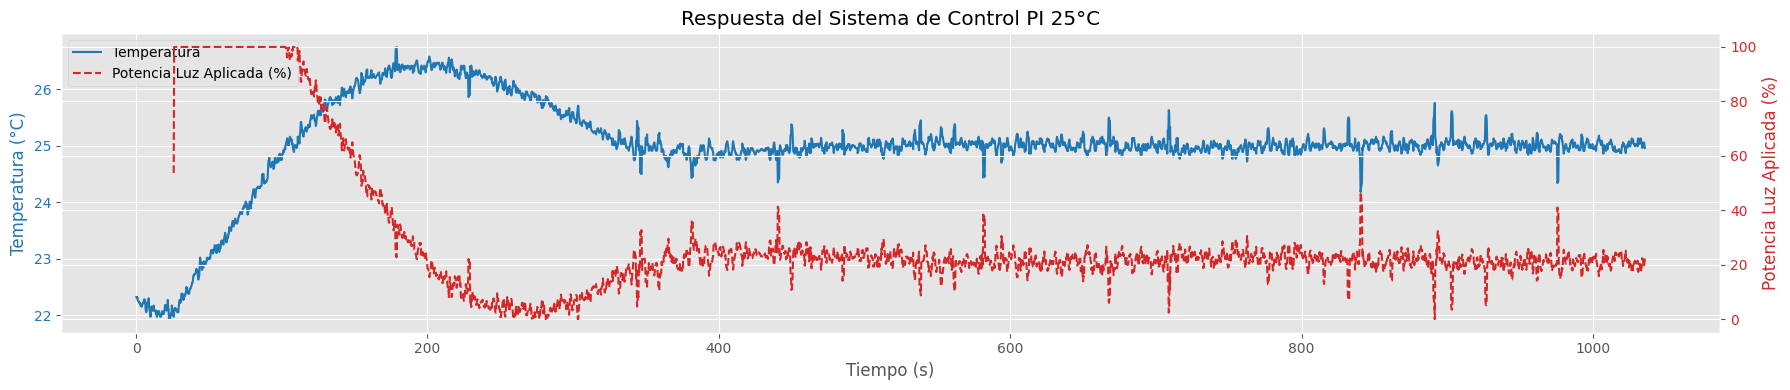

26.75

In [15]:
# Leer los archivos CSV de los ensayos con ventilador
archivo = 'CSV registros\Control automatico PI\Ensayo 5 25c.csv'
df = pd.read_csv(archivo, encoding='latin1')

fig, ax1 = plt.subplots(figsize=(18, 4))

# Eje para la temperatura
ax1.plot(df['Tiempo'], df['Temperatura (°C)'], label='Temperatura', color='tab:blue')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Temperatura (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Crear un segundo eje para la Potencia Luz Aplicada
ax2 = ax1.twinx()
ax2.plot(df['Tiempo'], df['Potencia Luz Aplicada (%)'], label='Potencia Luz Aplicada (%)', color='tab:red', linestyle='--')
ax2.set_ylabel('Potencia Luz Aplicada (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título del gráfico
plt.title('Respuesta del Sistema de Control PI 25°C')

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.grid(True)
plt.show()

df['Temperatura (°C)'].max()

In [16]:
#calcular media de temperatura cuando pasan 400 seg
df['Temperatura (°C)'][df['Tiempo'] > 400].mean()


24.99603880738287

In [17]:
# Temperatura deseada
T_deseada = 25.0

# Calcular el sobrepaso
sobrepaso = df['Temperatura (°C)'].max() - T_deseada

# Calcular el error máximo
error_maximo = np.max(np.abs(df['Temperatura (°C)'].max() - T_deseada))

# Calcular el error máximo porcentual
error_maximo_porcentual = (error_maximo / T_deseada) * 100

print(f'Sobrepaso: {sobrepaso:.2f} °C')
print(f'Error máximo porcentual: {error_maximo_porcentual:.2f} %')


Sobrepaso: 1.75 °C
Error máximo porcentual: 7.00 %
